# Run beta-binomial estimates and create JT/TV plots
 
**Author**: Katarina Braun 


## Overview
- Merge SNVs and indels across each day post infection 
    - Use only intersection SNVs
- Save these dataframes as CSV files
- Plot the dataframes as line plots 
    - X: DPI
    - Y: SNV/indel frequency  

### Reference 

Everything was mapped to the Japan reference sequence (MW219695.1) -- this is the consensus sequence for the inoculum that was used to infect the cats we are evaluating here. 

Nucleotide numbering scheme will therefore differ from the the numbering scheme used in Nextstrain. 

[Link](https://www.ncbi.nlm.nih.gov/nuccore/MW219695.1) to GenBank accession page for the reference sequence.

[Link](https://www.nejm.org/doi/full/10.1056/nejmc2013400) to the original NEJM report on transmission of SARS-CoV-2 in domestic cats by Halfmann et al. 

## Transmission events: 
1. pair 1 day 2 --> day 3
2. pair 2 day 5 --> day 6 
3. pair 3 day 4 --> day 5


## Input: 

1. Cleaned vcf files: 
    - `SARSCoV2_transmission_in_domestic_cats/data_derived/cleaned/*`

## Output: 

1. Figures showing variants frequencies over time:   
     - `SARSCoV2_in_domestic_cats/figure/*`


## Import modules and dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table

## import intersection VCFs (primer binding sites have been dropped) 

In [2]:
pair1 = pd.read_csv("../data_derived/cleaned/pair1_snps_over_time.csv", sep='\t')
pair2 = pd.read_csv("../data_derived/cleaned/pair2_snps_over_time.csv", sep='\t')
pair3 = pd.read_csv("../data_derived/cleaned/pair3_snps_over_time.csv", sep='\t')

##

In [3]:
# plot JT plots

<Figure size 720x720 with 0 Axes>

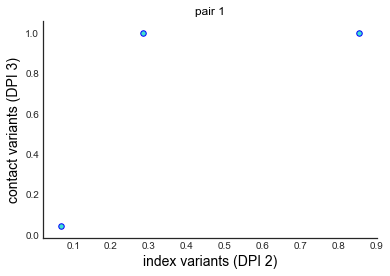

In [4]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,10))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

pair1.plot(kind='scatter', x='DPI 2 index', y='DPI 3 contact', s=30, c="turquoise", edgecolors='blue')

# add titles
plt.title("pair 1", loc='center', fontsize=12, fontweight=1, color='black')
plt.xlabel("index variants (DPI 2)", fontsize=14, fontweight=0, color='black')
plt.ylabel("contact variants (DPI 3)", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/JTplot_pair1.svg", bbox_inches='tight', dpi=300)

<Figure size 720x720 with 0 Axes>

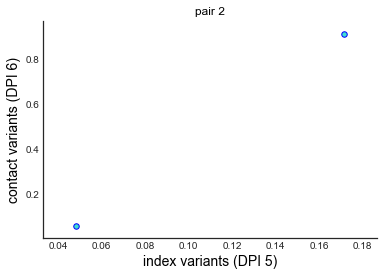

In [5]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,10))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

pair2.plot(kind='scatter', x='DPI 5 index', y='DPI 6 contact', s=30, c="turquoise", edgecolors='blue')

# add titles
plt.title("pair 2", loc='center', fontsize=12, fontweight=1, color='black')
plt.xlabel("index variants (DPI 5)", fontsize=14, fontweight=0, color='black')
plt.ylabel("contact variants (DPI 6)", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/JTplot_pair2.svg", bbox_inches='tight', dpi=300)

<Figure size 720x720 with 0 Axes>

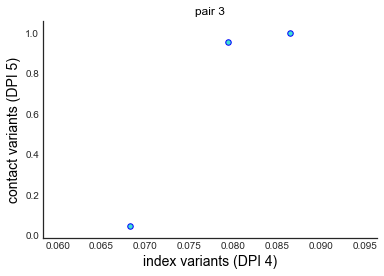

In [6]:
# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,10))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

pair3.plot(kind='scatter', x='DPI 4 index', y='DPI 5 contact', s=30, c="turquoise", edgecolors='blue')

# add titles
plt.title("pair 3", loc='center', fontsize=12, fontweight=1, color='black')
plt.xlabel("index variants (DPI 4)", fontsize=14, fontweight=0, color='black')
plt.ylabel("contact variants (DPI 5)", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/JTplot_pair3.svg", bbox_inches='tight', dpi=300)

<Figure size 720x720 with 0 Axes>

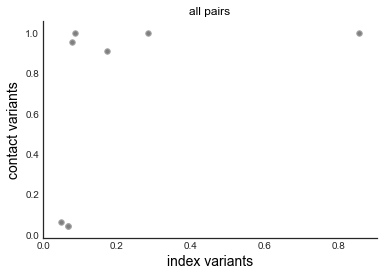

In [8]:
# all three on one JT plot

pair1 = pair1.rename(columns={'DPI 2 index':'index', 'DPI 3 contact': 'contact'})
pair2 = pair2.rename(columns={'DPI 5 index':'index', 'DPI 6 contact': 'contact'})
pair3 = pair3.rename(columns={'DPI 4 index':'index', 'DPI 5 contact': 'contact'})

JT = pd.concat([pair1, pair2, pair3], axis=0)

# style
plt.style.use('seaborn-white')
plt.figure(figsize=(10,10))

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

JT.plot(kind='scatter', x='index', y='contact', s=30, c="grey", edgecolors='darkgrey')

# add titles
plt.title("all pairs", loc='center', fontsize=12, fontweight=1, color='black')
plt.xlabel("index variants", fontsize=14, fontweight=0, color='black')
plt.ylabel("contact variants", fontsize=14, fontweight=0, color='black')

plt.savefig("../figures/JTplot_all.svg", bbox_inches='tight', dpi=300)

In [9]:
# prep datafiles for input into the beta-binomial R script 

### import modules and dependencies

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib as mpl
from matplotlib import gridspec
import itertools
import pysam
import matplotlib.patches as mpatches

In [11]:
import pysam

#### Generate files to go into the Koelle beta-binomial model to estimate transmission bottleneck sizes using SNP frequencies in index and donors 

syntax:  
index = donor  
contact = recipient 

**Notes from Katia Koelle regarding this model:**   
Assumptions about what SNPs are de novo vs transmitted make a huge difference. Since in our JVI paper we analyzed the contaminated Poon et al. data with a lot of within-host genetic diversity present, this didn't matter for our bottleneck estimates, but given that genetic diversity levels are actually really low within hosts, whether you assume an observed SNP is transmitted or arises de novo actually will make a big difference now.

1. If a SNP is observed at a frequency that indicates that it is likely fixed in a donor (i.e., that site is monomorphic in the donor), it shouldn't be included in the analysis, regardless of whether that site is polymorphic in the recipient.  


2. If a site is polymorphic in a donor (i.e., a SNP is present at a level that indicates that it is present but not fixed), it should be included in the analysis (regardless of whether the site is monomorphic or polymorphic in the recipient)  
    
    
    - A site being polymorphic (with a SNP being at high levels of ~50%) in the donor, and monomorphic in the recipient is an indication of a small bottleneck.  
    - A site being monomorphic in the donor, and polymorphic (especially at high SNP frequencies) in the recipient is also a strong indication of a small bottleneck. The more of these you see, the smaller the bottleneck likely is (assuming, that is, that you correctly identified a transmission pair)  
    
    
3. If your limit of detection is X, then any SNP below X or above 1-X should be considered fixed. (This is consistent with what McCrone does.) In my code, I assume that the input data for the donor consists ONLY of sites that are polymorphic (ie.. have SNPs that have values between X and 1-X), and the corresponding frequencies at those sites in the recipient. If the frequency at a given site in the recipient is below X or above 1-X, it shouldn't matter whether you set it to being fixed (i.e., set it to 0 or 1, respectively), or keep it at that observed value, of, for example, 0.005 or 0.995. Not 100% sure what Tyler Smith's R code assumes, so to be safe, you can set the frequencies at those recipient sites to 0 or 1 (depending on whether the SNP frequency is below X or above 1-X, respectively).  


4. Should I be including SNPs which are not present in the index but are present in the contact? --> No. These are very likely de novo variants. Their presence in your data indicate, however, that bottleneck sizes would be small.  


We assume that a SNP that is not observed in a recipient but present (but not fixed) in a donor can be either truly absent in the recipient, or present in the recipient only below the limit of detection.

**File that needs to be generated, input to beta-binomial model**:   
Column 1: frequency of SNP in index/donor  
Column 2: frequency of SNP in contact/recipient  
Column 3: total recipient reads --> I think this is "AD" in averaged VCF files  
Column 4: variant recipient reads --> I think this is "DP" in the average VCF files 

File type: `.txt`

Use 6 decimal positions for frequencies and read numbers.  
Separator = tab. 

Writing output files to this directory:     
`../beta_binomial/*`

Plug these files into this R script, located here:   
`./Bottleneck_size_estimation_exact.r`

syntax to run the exact model:   
```bash 
Rscript Bottleneck_size_estimation_exact.r --file pair2_beta-binomial-input.txt --plot_bool TRUE --var_calling_threshold 0.01 --Nb_min 1 --Nb_max 5000 --confidence_level 0.99
```
** this script is easiest to run from the directory where the script and the input files are located

In [12]:
# INDEX INFO 
index_1 = pd.read_csv(filepath_or_buffer='../data_derived/cleaned/1_2-intersection.csv', header=0, sep='\t', low_memory=False)
index_1['FREQ_index'] = index_1['%']
index_1 = index_1.rename(columns={'POS_x': 'POS'})
index_1 = index_1[['SNP', 'FREQ_index', 'POS']]
fixedrows50 = index_1[index_1['FREQ_index'] > 0.97].index
index_1.drop(fixedrows50, inplace=True)

index_2 = pd.read_csv(filepath_or_buffer='../data_derived/cleaned/2_5-intersection.csv', header=0, sep='\t', low_memory=False)
index_2['FREQ_index'] = index_2['%']
index_2 = index_2.rename(columns={'POS_x': 'POS'})
index_2 = index_2[['SNP', 'FREQ_index', 'POS']]
fixedrows50 = index_2[index_2['FREQ_index'] > 0.97].index
index_2.drop(fixedrows50, inplace=True)

index_3 = pd.read_csv(filepath_or_buffer='../data_derived/cleaned/3_4-intersection.csv', header=0, sep='\t', low_memory=False)
index_3['FREQ_index'] = index_3['%']
index_3 = index_3.rename(columns={'POS_x': 'POS'})
index_3 = index_3[['SNP', 'FREQ_index', 'POS']]
fixedrows50 = index_3[index_3['FREQ_index'] > 0.97].index
index_3.drop(fixedrows50, inplace=True)

#

In [13]:
# CONTACT INFO 
gene_dict = {"orf1ab":"ORF1ab", "s":"S", "orf3a":"ORF3a", "e":"E", "m":"M", "orf6":"ORF6", "orf7a":"ORF7a", "orf8":"ORF8", "n":"N", "orf10":"ORF10"}

contact4_3 = pd.read_csv(filepath_or_buffer='../data_derived/4_3A.vcf.recode.vcf', header=0, sep='\t', low_memory=False, skiprows=56)
sample = contact4_3.columns[9]
contact4_3_2 = contact4_3.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT'], axis=1)
contact4_3_2 = contact4_3_2[['POS', 'REF', 'ALT']] #POS, REF, ALT
contact4_3_3 = contact4_3['INFO'].str.split(';', expand=True) #nothing here (just need this DF to expand column 26)
contact4_3_5 = contact4_3_3[[12]] #SNP frequency 
contact4_3_5 = contact4_3_5.rename(columns={12:'FREQ_contact'})
contact4_3_6 = contact4_3_3[[8]] #SNP frequency
contact4_3_6 = contact4_3_6.rename(columns={8:'variant_reads_contact'})
contact4_3_7 = contact4_3_3[[9]]#variant_reads_contact
contact4_3_7 = contact4_3_7.rename(columns={9:'total_reads_contact'})
contact4_3_4 = contact4_3_3[26].str.split('|', expand=True) #1=annotation, 3=gene, 9=nt_change, 10=aa_change
contact4_3_4 = contact4_3_4[[1,3,9,10]]
contact4_3_4 = contact4_3_4.rename(columns={1:'annotation', 3:'gene', 9:'nt_change', 10:'aa_change'})
contact4_3 = pd.concat([contact4_3_2, contact4_3_4, contact4_3_5, contact4_3_6, contact4_3_7], axis=1, join='inner')
contact4_3['FREQ_contact'].replace(regex=True, inplace=True, to_replace=r'AF=', value='')
contact4_3['nt_change'].replace(regex=True, inplace=True, to_replace=r'c.', value='')
contact4_3['nt_change'] = contact4_3['nt_change'].str.replace('\d+', '') # get rid of POS in nt_change column 
contact4_3['aa_change'].replace(regex=True, inplace=True, to_replace=r'p.', value='')
contact4_3['annotation'].replace(regex=True, inplace=True, to_replace=r'_variant', value='')
contact4_3['annotation'].replace(regex=True, inplace=True, to_replace=r'_gained', value='')
contact4_3['annotation'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact4_3['nt_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact4_3['aa_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact4_3['variant_reads_contact'].replace(regex=True, inplace=True, to_replace=r'AD=', value='')
contact4_3['total_reads_contact'].replace(regex=True, inplace=True, to_replace=r'DP=', value='')
contact4_3['POS'] = contact4_3['POS'].apply(str)
contact4_3['SNP'] = contact4_3['gene'] + '_' + contact4_3['POS'] + ':' + contact4_3['REF'] + '>' + contact4_3['ALT'] +'_' + contact4_3['aa_change'] + '_' + contact4_3['annotation']
contact4_3["FREQ_contact"] = pd.to_numeric(contact4_3["FREQ_contact"]) #convert FREQ column from object type to int
contact4_3 = contact4_3[contact4_3.FREQ_contact >= 0.03]
contact4_3a = contact4_3[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

contact4_3 = pd.read_csv(filepath_or_buffer='../data_derived/4_3B.vcf.recode.vcf', header=0, sep='\t', low_memory=False, skiprows=56)
sample = contact4_3.columns[9]
contact4_3_2 = contact4_3.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT'], axis=1)
contact4_3_2 = contact4_3_2[['POS', 'REF', 'ALT']] #POS, REF, ALT
contact4_3_3 = contact4_3['INFO'].str.split(';', expand=True) #nothing here (just need this DF to expand column 26)
contact4_3_5 = contact4_3_3[[12]] #SNP frequency 
contact4_3_5 = contact4_3_5.rename(columns={12:'FREQ_contact'})
contact4_3_6 = contact4_3_3[[8]] #SNP frequency
contact4_3_6 = contact4_3_6.rename(columns={8:'variant_reads_contact'})
contact4_3_7 = contact4_3_3[[9]]#variant_reads_contact
contact4_3_7 = contact4_3_7.rename(columns={9:'total_reads_contact'})
contact4_3_4 = contact4_3_3[26].str.split('|', expand=True) #1=annotation, 3=gene, 9=nt_change, 10=aa_change
contact4_3_4 = contact4_3_4[[1,3,9,10]]
contact4_3_4 = contact4_3_4.rename(columns={1:'annotation', 3:'gene', 9:'nt_change', 10:'aa_change'})
contact4_3 = pd.concat([contact4_3_2, contact4_3_4, contact4_3_5, contact4_3_6, contact4_3_7], axis=1, join='inner')
contact4_3['FREQ_contact'].replace(regex=True, inplace=True, to_replace=r'AF=', value='')
contact4_3['nt_change'].replace(regex=True, inplace=True, to_replace=r'c.', value='')
contact4_3['nt_change'] = contact4_3['nt_change'].str.replace('\d+', '') # get rid of POS in nt_change column 
contact4_3['aa_change'].replace(regex=True, inplace=True, to_replace=r'p.', value='')
contact4_3['annotation'].replace(regex=True, inplace=True, to_replace=r'_variant', value='')
contact4_3['annotation'].replace(regex=True, inplace=True, to_replace=r'_gained', value='')
contact4_3['annotation'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact4_3['nt_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact4_3['aa_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact4_3['variant_reads_contact'].replace(regex=True, inplace=True, to_replace=r'AD=', value='')
contact4_3['total_reads_contact'].replace(regex=True, inplace=True, to_replace=r'DP=', value='')
contact4_3['POS'] = contact4_3['POS'].apply(str)
contact4_3['SNP'] = contact4_3['gene'] + '_' + contact4_3['POS'] + ':' + contact4_3['REF'] + '>' + contact4_3['ALT'] +'_' + contact4_3['aa_change'] + '_' + contact4_3['annotation']
contact4_3["FREQ_contact"] = pd.to_numeric(contact4_3["FREQ_contact"]) #convert FREQ column from object type to int
contact4_3 = contact4_3[contact4_3.FREQ_contact >= 0.03]
contact4_3b = contact4_3[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

contact4_3 = pd.merge(contact4_3a, contact4_3b, how='outer', on='SNP')
contact4_3 = contact4_3.dropna()
contact4_3['FREQ_contact_x'] = contact4_3['FREQ_contact_x'].astype(float).round(5)
contact4_3['FREQ_contact_y'] = contact4_3['FREQ_contact_y'].astype(float).round(5)
contact4_3['total_reads_contact_x'] = contact4_3['total_reads_contact_x'].astype(int)
contact4_3['total_reads_contact_y'] = contact4_3['total_reads_contact_y'].astype(int)
contact4_3['variant_reads_contact_x'] = contact4_3['variant_reads_contact_x'].astype(int)
contact4_3['variant_reads_contact_y'] = contact4_3['variant_reads_contact_y'].astype(int)
contact4_3['FREQ_contact'] = contact4_3[['FREQ_contact_x', 'FREQ_contact_y']].mean(axis=1)
contact4_3['total_reads_contact'] = contact4_3[['total_reads_contact_x', 'total_reads_contact_y']].mean(axis=1)
contact4_3['variant_reads_contact'] = contact4_3[['variant_reads_contact_x', 'variant_reads_contact_y']].mean(axis=1)
contact_4 = contact4_3[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

# contact4_3

#

In [14]:
# CONTACT INFO 
gene_dict = {"orf1ab":"ORF1ab", "s":"S", "orf3a":"ORF3a", "e":"E", "m":"M", "orf6":"ORF6", "orf7a":"ORF7a", "orf8":"ORF8", "n":"N", "orf10":"ORF10"}

contact5_6 = pd.read_csv(filepath_or_buffer='../data_derived/5_6A.vcf.recode.vcf', header=0, sep='\t', low_memory=False, skiprows=56)
sample = contact5_6.columns[9]
contact5_6_2 = contact5_6.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT'], axis=1)
contact5_6_2 = contact5_6_2[['POS', 'REF', 'ALT']] #POS, REF, ALT
contact5_6_3 = contact5_6['INFO'].str.split(';', expand=True) #nothing here (just need this DF to expand column 26)
contact5_6_5 = contact5_6_3[[12]] #SNP frequency 
contact5_6_5 = contact5_6_5.rename(columns={12:'FREQ_contact'})
contact5_6_6 = contact5_6_3[[8]] #SNP frequency
contact5_6_6 = contact5_6_6.rename(columns={8:'variant_reads_contact'})
contact5_6_7 = contact5_6_3[[9]]#variant_reads_contact
contact5_6_7 = contact5_6_7.rename(columns={9:'total_reads_contact'})
contact5_6_4 = contact5_6_3[26].str.split('|', expand=True) #1=annotation, 3=gene, 9=nt_change, 10=aa_change
contact5_6_4 = contact5_6_4[[1,3,9,10]]
contact5_6_4 = contact5_6_4.rename(columns={1:'annotation', 3:'gene', 9:'nt_change', 10:'aa_change'})
contact5_6 = pd.concat([contact5_6_2, contact5_6_4, contact5_6_5, contact5_6_6, contact5_6_7], axis=1, join='inner')
contact5_6['FREQ_contact'].replace(regex=True, inplace=True, to_replace=r'AF=', value='')
contact5_6['nt_change'].replace(regex=True, inplace=True, to_replace=r'c.', value='')
contact5_6['nt_change'] = contact5_6['nt_change'].str.replace('\d+', '') # get rid of POS in nt_change column 
contact5_6['aa_change'].replace(regex=True, inplace=True, to_replace=r'p.', value='')
contact5_6['annotation'].replace(regex=True, inplace=True, to_replace=r'_variant', value='')
contact5_6['annotation'].replace(regex=True, inplace=True, to_replace=r'_gained', value='')
contact5_6['annotation'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact5_6['nt_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact5_6['aa_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact5_6['variant_reads_contact'].replace(regex=True, inplace=True, to_replace=r'AD=', value='')
contact5_6['total_reads_contact'].replace(regex=True, inplace=True, to_replace=r'DP=', value='')
contact5_6['POS'] = contact5_6['POS'].apply(str)
contact5_6['SNP'] = contact5_6['gene'] + '_' + contact5_6['POS'] + ':' + contact5_6['REF'] + '>' + contact5_6['ALT'] +'_' + contact5_6['aa_change'] + '_' + contact5_6['annotation']
contact5_6["FREQ_contact"] = pd.to_numeric(contact5_6["FREQ_contact"]) #convert FREQ column from object type to int
contact5_6 = contact5_6[contact5_6.FREQ_contact >= 0.03]
contact5_6a = contact5_6[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

contact5_6 = pd.read_csv(filepath_or_buffer='../data_derived/5_6B.vcf.recode.vcf', header=0, sep='\t', low_memory=False, skiprows=56)
sample = contact5_6.columns[9]
contact5_6_2 = contact5_6.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT'], axis=1)
contact5_6_2 = contact5_6_2[['POS', 'REF', 'ALT']] #POS, REF, ALT
contact5_6_3 = contact5_6['INFO'].str.split(';', expand=True) #nothing here (just need this DF to expand column 26)
contact5_6_5 = contact5_6_3[[12]] #SNP frequency 
contact5_6_5 = contact5_6_5.rename(columns={12:'FREQ_contact'})
contact5_6_6 = contact5_6_3[[8]] #SNP frequency
contact5_6_6 = contact5_6_6.rename(columns={8:'variant_reads_contact'})
contact5_6_7 = contact5_6_3[[9]]#variant_reads_contact
contact5_6_7 = contact5_6_7.rename(columns={9:'total_reads_contact'})
contact5_6_4 = contact5_6_3[26].str.split('|', expand=True) #1=annotation, 3=gene, 9=nt_change, 10=aa_change
contact5_6_4 = contact5_6_4[[1,3,9,10]]
contact5_6_4 = contact5_6_4.rename(columns={1:'annotation', 3:'gene', 9:'nt_change', 10:'aa_change'})
contact5_6 = pd.concat([contact5_6_2, contact5_6_4, contact5_6_5, contact5_6_6, contact5_6_7], axis=1, join='inner')
contact5_6['FREQ_contact'].replace(regex=True, inplace=True, to_replace=r'AF=', value='')
contact5_6['nt_change'].replace(regex=True, inplace=True, to_replace=r'c.', value='')
contact5_6['nt_change'] = contact5_6['nt_change'].str.replace('\d+', '') # get rid of POS in nt_change column 
contact5_6['aa_change'].replace(regex=True, inplace=True, to_replace=r'p.', value='')
contact5_6['annotation'].replace(regex=True, inplace=True, to_replace=r'_variant', value='')
contact5_6['annotation'].replace(regex=True, inplace=True, to_replace=r'_gained', value='')
contact5_6['annotation'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact5_6['nt_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact5_6['aa_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact5_6['variant_reads_contact'].replace(regex=True, inplace=True, to_replace=r'AD=', value='')
contact5_6['total_reads_contact'].replace(regex=True, inplace=True, to_replace=r'DP=', value='')
contact5_6['POS'] = contact5_6['POS'].apply(str)
contact5_6['SNP'] = contact5_6['gene'] + '_' + contact5_6['POS'] + ':' + contact5_6['REF'] + '>' + contact5_6['ALT'] +'_' + contact5_6['aa_change'] + '_' + contact5_6['annotation']
contact5_6["FREQ_contact"] = pd.to_numeric(contact5_6["FREQ_contact"]) #convert FREQ column from object type to int
contact5_6 = contact5_6[contact5_6.FREQ_contact >= 0.03]
contact5_6b = contact5_6[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

contact5_6 = pd.merge(contact5_6a, contact5_6b, how='outer', on='SNP')
contact5_6 = contact5_6.dropna()
contact5_6['FREQ_contact_x'] = contact5_6['FREQ_contact_x'].astype(float).round(5)
contact5_6['FREQ_contact_y'] = contact5_6['FREQ_contact_y'].astype(float).round(5)
contact5_6['total_reads_contact_x'] = contact5_6['total_reads_contact_x'].astype(int)
contact5_6['total_reads_contact_y'] = contact5_6['total_reads_contact_y'].astype(int)
contact5_6['variant_reads_contact_x'] = contact5_6['variant_reads_contact_x'].astype(int)
contact5_6['variant_reads_contact_y'] = contact5_6['variant_reads_contact_y'].astype(int)
contact5_6['FREQ_contact'] = contact5_6[['FREQ_contact_x', 'FREQ_contact_y']].mean(axis=1)
contact5_6['total_reads_contact'] = contact5_6[['total_reads_contact_x', 'total_reads_contact_y']].mean(axis=1)
contact5_6['variant_reads_contact'] = contact5_6[['variant_reads_contact_x', 'variant_reads_contact_y']].mean(axis=1)
contact_5 = contact5_6[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

# contact5_6

In [15]:
# CONTACT INFO 
gene_dict = {"orf1ab":"ORF1ab", "s":"S", "orf3a":"ORF3a", "e":"E", "m":"M", "orf6":"ORF6", "orf7a":"ORF7a", "orf8":"ORF8", "n":"N", "orf10":"ORF10"}

contact6_5 = pd.read_csv(filepath_or_buffer='../data_derived/6_5A.vcf.recode.vcf', header=0, sep='\t', low_memory=False, skiprows=56)
sample = contact6_5.columns[9]
contact6_5_2 = contact6_5.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT'], axis=1)
contact6_5_2 = contact6_5_2[['POS', 'REF', 'ALT']] #POS, REF, ALT
contact6_5_3 = contact6_5['INFO'].str.split(';', expand=True) #nothing here (just need this DF to expand column 26)
contact6_5_5 = contact6_5_3[[12]] #SNP frequency 
contact6_5_5 = contact6_5_5.rename(columns={12:'FREQ_contact'})
contact6_5_6 = contact6_5_3[[8]] #SNP frequency
contact6_5_6 = contact6_5_6.rename(columns={8:'variant_reads_contact'})
contact6_5_7 = contact6_5_3[[9]]#variant_reads_contact
contact6_5_7 = contact6_5_7.rename(columns={9:'total_reads_contact'})
contact6_5_4 = contact6_5_3[26].str.split('|', expand=True) #1=annotation, 3=gene, 9=nt_change, 10=aa_change
contact6_5_4 = contact6_5_4[[1,3,9,10]]
contact6_5_4 = contact6_5_4.rename(columns={1:'annotation', 3:'gene', 9:'nt_change', 10:'aa_change'})
contact6_5 = pd.concat([contact6_5_2, contact6_5_4, contact6_5_5, contact6_5_6, contact6_5_7], axis=1, join='inner')
contact6_5['FREQ_contact'].replace(regex=True, inplace=True, to_replace=r'AF=', value='')
contact6_5['nt_change'].replace(regex=True, inplace=True, to_replace=r'c.', value='')
contact6_5['nt_change'] = contact6_5['nt_change'].str.replace('\d+', '') # get rid of POS in nt_change column 
contact6_5['aa_change'].replace(regex=True, inplace=True, to_replace=r'p.', value='')
contact6_5['annotation'].replace(regex=True, inplace=True, to_replace=r'_variant', value='')
contact6_5['annotation'].replace(regex=True, inplace=True, to_replace=r'_gained', value='')
contact6_5['annotation'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact6_5['nt_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact6_5['aa_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact6_5['variant_reads_contact'].replace(regex=True, inplace=True, to_replace=r'AD=', value='')
contact6_5['total_reads_contact'].replace(regex=True, inplace=True, to_replace=r'DP=', value='')
contact6_5['POS'] = contact6_5['POS'].apply(str)
contact6_5['SNP'] = contact6_5['gene'] + '_' + contact6_5['POS'] + ':' + contact6_5['REF'] + '>' + contact6_5['ALT'] +'_' + contact6_5['aa_change'] + '_' + contact6_5['annotation']
contact6_5["FREQ_contact"] = pd.to_numeric(contact6_5["FREQ_contact"]) #convert FREQ column from object type to int
contact6_5 = contact6_5[contact6_5.FREQ_contact >= 0.03]
contact6_5a = contact6_5[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

contact6_5 = pd.read_csv(filepath_or_buffer='../data_derived/6_5B.vcf.recode.vcf', header=0, sep='\t', low_memory=False, skiprows=56)
sample = contact6_5.columns[9]
contact6_5_2 = contact6_5.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT'], axis=1)
contact6_5_2 = contact6_5_2[['POS', 'REF', 'ALT']] #POS, REF, ALT
contact6_5_3 = contact6_5['INFO'].str.split(';', expand=True) #nothing here (just need this DF to expand column 26)
contact6_5_5 = contact6_5_3[[12]] #SNP frequency 
contact6_5_5 = contact6_5_5.rename(columns={12:'FREQ_contact'})
contact6_5_6 = contact6_5_3[[8]] #SNP frequency
contact6_5_6 = contact6_5_6.rename(columns={8:'variant_reads_contact'})
contact6_5_7 = contact6_5_3[[9]]#variant_reads_contact
contact6_5_7 = contact6_5_7.rename(columns={9:'total_reads_contact'})
contact6_5_4 = contact6_5_3[26].str.split('|', expand=True) #1=annotation, 3=gene, 9=nt_change, 10=aa_change
contact6_5_4 = contact6_5_4[[1,3,9,10]]
contact6_5_4 = contact6_5_4.rename(columns={1:'annotation', 3:'gene', 9:'nt_change', 10:'aa_change'})
contact6_5 = pd.concat([contact6_5_2, contact6_5_4, contact6_5_5, contact6_5_6, contact6_5_7], axis=1, join='inner')
contact6_5['FREQ_contact'].replace(regex=True, inplace=True, to_replace=r'AF=', value='')
contact6_5['nt_change'].replace(regex=True, inplace=True, to_replace=r'c.', value='')
contact6_5['nt_change'] = contact6_5['nt_change'].str.replace('\d+', '') # get rid of POS in nt_change column 
contact6_5['aa_change'].replace(regex=True, inplace=True, to_replace=r'p.', value='')
contact6_5['annotation'].replace(regex=True, inplace=True, to_replace=r'_variant', value='')
contact6_5['annotation'].replace(regex=True, inplace=True, to_replace=r'_gained', value='')
contact6_5['annotation'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact6_5['nt_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact6_5['aa_change'].replace(regex=True, inplace=True, to_replace=r'_', value='-')
contact6_5['variant_reads_contact'].replace(regex=True, inplace=True, to_replace=r'AD=', value='')
contact6_5['total_reads_contact'].replace(regex=True, inplace=True, to_replace=r'DP=', value='')
contact6_5['POS'] = contact6_5['POS'].apply(str)
contact6_5['SNP'] = contact6_5['gene'] + '_' + contact6_5['POS'] + ':' + contact6_5['REF'] + '>' + contact6_5['ALT'] +'_' + contact6_5['aa_change'] + '_' + contact6_5['annotation']
contact6_5["FREQ_contact"] = pd.to_numeric(contact6_5["FREQ_contact"]) #convert FREQ column from object type to int
contact6_5 = contact6_5[contact6_5.FREQ_contact >= 0.03]
contact6_5b = contact6_5[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

contact6_5 = pd.merge(contact6_5a, contact6_5b, how='outer', on='SNP')
contact6_5 = contact6_5.dropna()
contact6_5['FREQ_contact_x'] = contact6_5['FREQ_contact_x'].astype(float).round(5)
contact6_5['FREQ_contact_y'] = contact6_5['FREQ_contact_y'].astype(float).round(5)
contact6_5['total_reads_contact_x'] = contact6_5['total_reads_contact_x'].astype(int)
contact6_5['total_reads_contact_y'] = contact6_5['total_reads_contact_y'].astype(int)
contact6_5['variant_reads_contact_x'] = contact6_5['variant_reads_contact_x'].astype(int)
contact6_5['variant_reads_contact_y'] = contact6_5['variant_reads_contact_y'].astype(int)
contact6_5['FREQ_contact'] = contact6_5[['FREQ_contact_x', 'FREQ_contact_y']].mean(axis=1)
contact6_5['total_reads_contact'] = contact6_5[['total_reads_contact_x', 'total_reads_contact_y']].mean(axis=1)
contact6_5['variant_reads_contact'] = contact6_5[['variant_reads_contact_x', 'variant_reads_contact_y']].mean(axis=1)
contact_6 = contact6_5[['SNP', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]

# contact6_5

In [20]:
# merge index and contact dataframes

BB_1 = pd.merge(index_1, contact_4, how='outer', on=['SNP'])
BB_1 = BB_1.replace(np.nan, 0) # the below is commented out because there are no SNPs that are found in the index not found in the contact in pair 1 == we don't have to do the next few cells for pair 1
# tolist_1 = BB_1.loc[BB_1['total_reads_contact'] == 0]
# tolist_1 = tolist_1.drop(['FREQ_index', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact'], axis=1)
# tolist_1['SNP'] = tolist_1['SNP'].replace({'stop_gained':'stopgained'})
# tolist_1[['gene', 'pos', 'annotation', 'annotation2']] = tolist_1['SNP'].str.split('_', expand=True)
# tolist_1 = tolist_1.drop(['annotation', 'annotation2', 'pos'], axis=1)
# contact_SNP_1 = {k: g["POS"].tolist() for k,g in tolist_1.groupby("gene")}

BB_2 = pd.merge(index_2, contact_5, how='outer', on=['SNP'])
BB_2 = BB_2.replace(np.nan, 0)
tolist_2 = BB_2.loc[BB_2['total_reads_contact'] == 0]
tolist_2 = tolist_2.drop(['FREQ_index', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact'], axis=1)
tolist_2['SNP'] = tolist_2['SNP'].replace({'stop_gained':'stopgained'})
tolist_2[['gene', 'pos', 'annotation', 'annotation2']] = tolist_2['SNP'].str.split('_', expand=True)
tolist_2 = tolist_2.drop(['annotation', 'annotation2', 'pos'], axis=1)
contact_SNP_2 = {k: g["POS"].tolist() for k,g in tolist_2.groupby("gene")}

BB_3 = pd.merge(index_3, contact_6, how='outer', on=['SNP'])
BB_3 = BB_3.replace(np.nan, 0)
tolist_3 = BB_3.loc[BB_3['total_reads_contact'] == 0]
tolist_3 = tolist_3.drop(['FREQ_index', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact'], axis=1)
tolist_3[['gene', 'pos', 'annotation', 'annotation2']] = tolist_3['SNP'].str.split('_', expand=True)
tolist_3 = tolist_3.drop(['annotation', 'annotation2', 'pos'], axis=1)
contact_SNP_3 = {k: g["POS"].tolist() for k,g in tolist_3.groupby("gene")}

In [21]:
# this is function to get average read counts at each position 
def getReadDepth(bamfile, segment, pos):
    sam = pysam.AlignmentFile(bamfile, "rb")
    pileup = sam.pileup(contig=segment, start=pos-1, end=pos, truncate=True, stepper="nofilter")
    column = next(pileup)
    column.set_min_base_quality(30)
    return column.get_num_aligned()

In [12]:
%%bash

## use samtools to index the novoalign bam that the modified zequencer generated

samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/1_2A.bam'
samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/1_2B.bam'

samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/2_5A.bam'
samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/2_5B.bam'

samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/3_4A.bam'
samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/3_4B.bam'

samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/4_3A.bam'
samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/4_3B.bam'

samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/5_6A.bam'
samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/5_6B.bam'

samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/6_5A.bam'
samtools index '/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/6_5B.bam'


#

In [22]:
# Below is the rest of code I used to generate input files for the beta-binomial exact code:   

# The files generated from running this code as well as the exact binomial plots can all be found in 
# ```beta_binomial/*``` and are labeled according to transmission pair. 
                                
# getting the correct entries for column 3 is going to be a little tricky 
# I have to do is go back to the normalized BAM files and extract DP = average read depth at each position 

#index
bam1_2A="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/1_2A.bam"
bam1_2B="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/1_2B.bam"
bam2_5A="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/2_5A.bam"
bam2_5B="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/2_5B.bam"
bam3_4A="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/3_4A.bam"
bam3_4B="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/3_4B.bam"

#contacts
bam4_3A="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/4_3A.bam"
bam4_3B="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/4_3B.bam"
bam5_6A="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/5_6A.bam"
bam5_6B="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/5_6B.bam"
bam6_5A="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/6_5A.bam"
bam6_5B="/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/called-tokyo/bam/6_5B.bam"

##

In [23]:
# apply the getReadDepth function to the dataframe DF_tolist slice, which contains
# tolist_1['total_reads_contact_1'] = tolist_1.apply(lambda x:getReadDepth(bam4_3A, 'MW219695.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/JPN/UT-NCGM02/2020, complete genome', x['POS']), axis=1)
tolist_2['total_reads_contact_1'] = tolist_2.apply(lambda x:getReadDepth(bam5_6A, 'MW219695.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/JPN/UT-NCGM02/2020, complete genome', x['POS']), axis=1)
tolist_3['total_reads_contact_1'] = tolist_3.apply(lambda x:getReadDepth(bam6_5A, 'MW219695.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/JPN/UT-NCGM02/2020, complete genome', x['POS']), axis=1)

# tolist_1['total_reads_contact_2'] = tolist_1.apply(lambda x:getReadDepth(bam4_3B, 'MW219695.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/JPN/UT-NCGM02/2020, complete genome', x['POS']), axis=1)
tolist_2['total_reads_contact_2'] = tolist_2.apply(lambda x:getReadDepth(bam5_6A, 'MW219695.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/JPN/UT-NCGM02/2020, complete genome', x['POS']), axis=1)
tolist_3['total_reads_contact_2'] = tolist_3.apply(lambda x:getReadDepth(bam6_5A, 'MW219695.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/JPN/UT-NCGM02/2020, complete genome', x['POS']), axis=1)

#average rep 1 and 2
# tolist_1['total_reads_contact_1'] = tolist_1['total_reads_contact_1'].astype(int)
# tolist_1['total_reads_contact_2'] = tolist_1['total_reads_contact_2'].astype(int)
# tolist_1['total_reads_contact'] = tolist_1[['total_reads_contact_1', 'total_reads_contact_2']].mean(axis=1)
# tolist_1 = tolist_1[['SNP', 'POS', 'gene', 'total_reads_contact']]

tolist_2['total_reads_contact_1'] = tolist_2['total_reads_contact_1'].astype(int)
tolist_2['total_reads_contact_2'] = tolist_2['total_reads_contact_2'].astype(int)
tolist_2['total_reads_contact'] = tolist_2[['total_reads_contact_1', 'total_reads_contact_2']].mean(axis=1)
tolist_2 = tolist_2[['SNP', 'POS', 'gene', 'total_reads_contact']]

tolist_3['total_reads_contact_1'] = tolist_3['total_reads_contact_1'].astype(int)
tolist_3['total_reads_contact_2'] = tolist_3['total_reads_contact_2'].astype(int)
tolist_3['total_reads_contact'] = tolist_3[['total_reads_contact_1', 'total_reads_contact_2']].mean(axis=1)
tolist_3 = tolist_3[['SNP', 'POS', 'gene', 'total_reads_contact']]

#

In [25]:
# update the BB dataframe with the read depth info 
# contactDP_1 = tolist_1.drop(['gene', 'POS'], axis=1)
# DF_final_1 = contactDP_1.combine_first(BB_1).reindex(BB_1.index)
DF_final_1 = BB_1[['SNP', 'FREQ_index', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]
DF_final_1.to_csv('../data_derived/beta_binomial/final_pair1_SNPs.csv', sep='\t')

contactDP_2 = tolist_2.drop(['gene', 'POS'], axis=1)
DF_final_2 = contactDP_2.combine_first(BB_2).reindex(BB_2.index)
DF_final_2 = DF_final_2[['SNP', 'FREQ_index', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]
DF_final_2.to_csv('../data_derived/beta_binomial/final_pair2_SNPs.csv', sep='\t')

contactDP_3 = tolist_3.drop(['gene', 'POS'], axis=1)
DF_final_3 = contactDP_3.combine_first(BB_3).reindex(BB_3.index)
DF_final_3 = DF_final_3[['SNP', 'FREQ_index', 'FREQ_contact', 'total_reads_contact', 'variant_reads_contact']]
DF_final_3.to_csv('../data_derived/beta_binomial/final_pair3_SNPs.csv', sep='\t')


# drop rows where FREQ_index = 0 and FREQ_contact != 0 because these rows are likely 
# de novo variants and the beta-binomial model doesn't incorporate these yet 
DF_final_1 = DF_final_1[DF_final_1.FREQ_index != 0]
DF_final_noSNPs_1 = DF_final_1.drop(['SNP'], axis=1)

DF_final_2 = DF_final_2[DF_final_2.FREQ_index != 0]
DF_final_noSNPs_2 = DF_final_2.drop(['SNP'], axis=1)

DF_final_3 = DF_final_3[DF_final_3.FREQ_index != 0]
DF_final_noSNPs_3 = DF_final_3.drop(['SNP'], axis=1)

# convert anything >0.99 to 0.999999 (assumed to be fixed) 
DF_final_noSNPs_1['FREQ_contact'] = np.where(DF_final_noSNPs_1['FREQ_contact']>=0.97, 0.999999, DF_final_noSNPs_1['FREQ_contact'])
DF_final_noSNPs_2['FREQ_contact'] = np.where(DF_final_noSNPs_2['FREQ_contact']>=0.97, 0.999999, DF_final_noSNPs_2['FREQ_contact'])
DF_final_noSNPs_3['FREQ_contact'] = np.where(DF_final_noSNPs_3['FREQ_contact']>=0.97, 0.999999, DF_final_noSNPs_3['FREQ_contact'])

# convert to string
DF_final_noSNPs_1 = DF_final_noSNPs_1.astype(str)
DF_final_noSNPs_2 = DF_final_noSNPs_2.astype(str)
DF_final_noSNPs_3 = DF_final_noSNPs_3.astype(str)

DF_final_noSNPs_1 = DF_final_noSNPs_1.astype(float).round(6)
DF_final_noSNPs_2 = DF_final_noSNPs_2.astype(float).round(6)
DF_final_noSNPs_3 = DF_final_noSNPs_3.astype(float).round(6)

# pd.set_option('display.float_format','{:.6f}'.format)

# # save to text file 
DF_final_noSNPs_1.to_csv('../data_derived/beta_binomial/pair1_beta-binomial-input.txt', sep='\t', header=None, index=False, float_format='%.6f')
DF_final_noSNPs_2.to_csv('../data_derived/beta_binomial/pair2_beta-binomial-input.txt', sep='\t', header=None, index=False, float_format='%.6f')
DF_final_noSNPs_3.to_csv('../data_derived/beta_binomial/pair3_beta-binomial-input.txt', sep='\t', header=None, index=False, float_format='%.6f')

# 

In [26]:
%%bash 


Rscript Bottleneck_size_estimation_exact.r --file '../data_derived/beta_binomial/pair1_beta-binomial-input.txt' --plot_bool TRUE --var_calling_threshold 0.03 --Nb_min 1 --Nb_max 100 --confidence_level 0.99

##

null device 
          1 
[1] "Bottleneck size"
[1] 5
[1] "confidence interval left bound"
[1] 1
[1] "confidence interval right bound"
[1] 10



Attaching package: ‘rmutil’

The following object is masked from ‘package:stats’:

    nobs

The following objects are masked from ‘package:base’:

    as.data.frame, units

There were 50 or more warnings (use warnings() to see the first 50)


In [28]:
%%bash 


Rscript Bottleneck_size_estimation_exact.r --file '../data_derived/beta_binomial/pair2_beta-binomial-input.txt' --plot_bool TRUE --var_calling_threshold 0.03 --Nb_min 1 --Nb_max 100 --confidence_level 0.99

##

null device 
          1 
[1] "Bottleneck size"
[1] 3
[1] "confidence interval left bound"
[1] 1
[1] "confidence interval right bound"
[1] 7



Attaching package: ‘rmutil’

The following object is masked from ‘package:stats’:

    nobs

The following objects are masked from ‘package:base’:

    as.data.frame, units

There were 50 or more warnings (use warnings() to see the first 50)


In [29]:
%%bash 


Rscript Bottleneck_size_estimation_exact.r --file '../data_derived/beta_binomial/pair3_beta-binomial-input.txt' --plot_bool TRUE --var_calling_threshold 0.03 --Nb_min 1 --Nb_max 100 --confidence_level 0.99

#

null device 
          1 
[1] "Bottleneck size"
[1] 2
[1] "confidence interval left bound"
[1] 1
[1] "confidence interval right bound"
[1] 3



Attaching package: ‘rmutil’

The following object is masked from ‘package:stats’:

    nobs

The following objects are masked from ‘package:base’:

    as.data.frame, units

There were 50 or more warnings (use warnings() to see the first 50)


/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


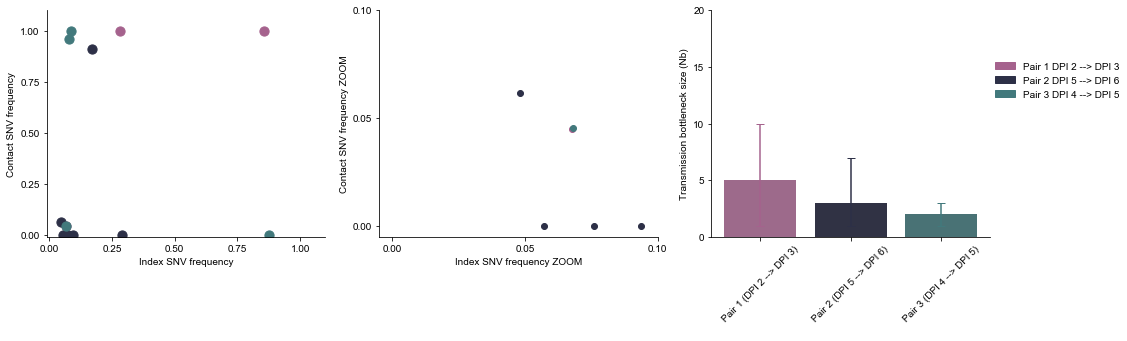

In [30]:
# define hex colors
pair1 = '#A5628D'
pair2 = '#2D3047'
pair3 = '#42797C'

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(14,8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 12)

ax1 = fig.add_subplot(gs[0,0:4]) # JT/TV plot
ax2 = fig.add_subplot(gs[0,4:8]) # JT/TV plot - ZOOM
ax3 = fig.add_subplot(gs[0,8:12]) # beta-binomial estimates 

# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
# set fontsize of axes 
ax = plt.gca()
for ax in axes: 
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)

# FOR PLOT 4A 
ax1.scatter(DF_final_noSNPs_1.FREQ_index, DF_final_noSNPs_1.FREQ_contact, facecolor='#A5628D', edgecolor='#A5628D', s=85)
ax1.scatter(DF_final_noSNPs_2.FREQ_index, DF_final_noSNPs_2.FREQ_contact, facecolor='#2D3047', edgecolor='#2D3047', s=85)
ax1.scatter(DF_final_noSNPs_3.FREQ_index, DF_final_noSNPs_3.FREQ_contact, facecolor='#42797C', edgecolor='#42797C', s=85)

# edit the axes - ax1
ax1.set_title('', fontname='Arial', fontsize=14)
ax1.set_ylabel('Contact SNV frequency', fontname='Arial', fontsize=10)
ax1.set_xlabel('Index SNV frequency', fontname='Arial', fontsize=10)
ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(-0.01,1.1)
ax1.set_yticks([0,0.25,0.5,0.75,1.0])
ax1.set_xlim(-0.01,1.1)
ax1.set_xticks([0,0.25,0.5,0.75,1.0])

#FOR PLOT 4B
ax2.scatter(DF_final_noSNPs_1.FREQ_index, DF_final_noSNPs_1.FREQ_contact, facecolor='#A5628D', edgecolor='#A5628D')
ax2.scatter(DF_final_noSNPs_2.FREQ_index, DF_final_noSNPs_2.FREQ_contact, facecolor='#2D3047', edgecolor='#2D3047')
ax2.scatter(DF_final_noSNPs_3.FREQ_index, DF_final_noSNPs_3.FREQ_contact, facecolor='#42797C', edgecolor='#42797C')

# edit the axes - ax2
ax2.set_title('', fontname='Arial', fontsize=14)
ax2.set_ylabel('Contact SNV frequency ZOOM', fontname='Arial', fontsize=10)
ax2.set_xlabel('Index SNV frequency ZOOM', fontname='Arial', fontsize=10)
ax2.set_facecolor('white')
for tick in ax2.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Arial")
ax2.set_ylim(-0.005, 0.1)
ax2.set_yticks([0, 0.05, 0.1])
ax2.set_xlim(-0.005, 0.1)
ax2.set_xticks([0, 0.05, 0.1])

# FOR PLOT 4C 
# these values for the bottleneck size (Nb) as well as left and right confidence intervals 
# are pulled from the cells above, which document the output from the exact beta-binomial model
BB = pd.DataFrame({"":['Pair 1 (DPI 2 --> DPI 3)', 'Pair 2 (DPI 5 --> DPI 6)', 'Pair 3 (DPI 4 --> DPI 5)'], "Nb":[5,3,2], "CI-left":[1,1,1], "CI-right":[10,7,3]})
BB_pair1 = BB.loc[[0]]
BB_pair2 = BB.loc[[1]]
BB_pair3 = BB.loc[[2]]

yerr_pair1 = [BB_pair1['Nb'] - BB_pair1['CI-left'], BB_pair1['CI-right'] - BB_pair1['Nb']]
yerr_pair2 = [BB_pair2['Nb'] - BB_pair2['CI-left'], BB_pair2['CI-right'] - BB_pair2['Nb']]
yerr_pair3 = [BB_pair3['Nb'] - BB_pair3['CI-left'], BB_pair3['CI-right'] - BB_pair3['Nb']]

# axes
flatui = ['#A5628D', '#2D3047', '#42797C']
sns.set_palette(flatui)
ax3 = sns.barplot('', 'Nb', data=BB, ci=None)
ax3.set_ylabel('Transmission bottleneck size (Nb)', fontname='Arial', fontsize=10)
# ax3.set_xlabel('Transmission events', fontname='Arial', fontsize=10)
ax3.errorbar(x=BB_pair1[''], y=BB_pair1['Nb'], yerr=yerr_pair1, fmt='b', capsize=4, ecolor='#A5628D')
ax3.errorbar(x=BB_pair2[''], y=BB_pair2['Nb'], yerr=yerr_pair2, fmt='b', capsize=4, ecolor='#2D3047')
ax3.errorbar(x=BB_pair3[''], y=BB_pair3['Nb'], yerr=yerr_pair3, fmt='b', capsize=4, ecolor='#42797C')

# edit the axes - ax3
ax3.set_title('', fontname='Arial', fontsize=14)
ax3.set_ylabel('Transmission bottleneck size (Nb)', fontname='Arial', fontsize=10)
ax3.set_facecolor('white')
for tick in ax3.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax3.get_yticklabels():
    tick.set_fontname("Arial")
ax3.set_ylim(0,20)
ax3.set_yticks([0,5,10,15,20])
plt.xticks(rotation=45)

# add a legend to this plot
Pair_1 = mpatches.Patch(color=pair1, label='Pair 1 DPI 2 --> DPI 3')
Pair_2 = mpatches.Patch(color=pair2, label='Pair 2 DPI 5 --> DPI 6')
Pair_3 = mpatches.Patch(color=pair3, label='Pair 3 DPI 4 --> DPI 5')
fig.legend(handles=[Pair_1, Pair_2, Pair_3], frameon=False, fontsize=10, bbox_to_anchor=(1.12,0.5))
   
# use tight_layout to optimize spacing of axes and titles within each subplot
fig.tight_layout()
fig.show()

# save this plot to the figures folder 
fig.savefig("../figures/beta-binomial-estimates.svg", bbox_inches='tight', dpi=300)
